In [5]:
from sklearn.learning_curve import learning_curve 
from sklearn.svm import SVC 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cross_validation import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
import pandas as pd
%matplotlib inline

data = pd.read_csv("Initial_screening_as_training_data.csv")
data.head()

# Treat the new assembled pathway with production lower than 50% of original pathway as negative. Otherwise positive.
positive = data[data['Normalized Production Amount Compared to Original Biosynthesis Pathway']>=0.5]  
negative = data[data['Normalized Production Amount Compared to Original Biosynthesis Pathway']<0.5]

negative.insert(2,'Positive',2)    # label negative combination as '2' as a new column
positive.insert(2, 'Positive',1)   # label positive combinations as '1' as a new column

data_processed = positive.append(negative, ignore_index= True)
data_processed.drop('Normalized Production Amount Compared to Original Biosynthesis Pathway', axis=1, inplace=True)
#print(data1)

X = data_processed.ix[ :,['Cassette Part 1 Analogues No.','Cassette Part 2 Analogues No.']].values
y = data_processed['Positive'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.888888888889


In [7]:
from sklearn.cross_validation import cross_val_score 

scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

print(scores)
print(scores.mean())

[ 0.75        0.875       0.875       0.83333333  0.33333333]
0.733333333333


In [9]:
# Plot 2-D graph with predictions to show the possible hits to be focused on 
Cassette_Part_1_Analogues=[]
i=0
for i in range(46):
    i = i+1
    for j in range(23):
        Cassette_Part_1_Analogues.append(i)


Cassette_Part_2_Analogues=[]
k=0
for k in range(46):
    a=0
    for a in range(23):
        a= a+1
        Cassette_Part_2_Analogues.append(a)


A = np.array(Cassette_Part_1_Analogues)
B = np.array(Cassette_Part_2_Analogues)

D = np.vstack((A,B))   # horizontal stack

print(D)

[[ 1  1  1 ..., 46 46 46]
 [ 1  2  3 ..., 21 22 23]]


In [10]:
F = D.T
print(F)

[[ 1  1]
 [ 1  2]
 [ 1  3]
 ..., 
 [46 21]
 [46 22]
 [46 23]]


In [11]:
predictions = knn.predict(F)
print(predictions)

[2 2 2 ..., 2 2 2]


In [12]:
G = predictions[np.newaxis,:]
print(G.shape, F.shape, predictions.shape) # predictions are need to be added 1 dimension to match with F array.

(1, 1058) (1058, 2) (1058,)


In [13]:
Predictions_transformed = G.T
print(Predictions_transformed, Predictions_transformed.shape)

[[2]
 [2]
 [2]
 ..., 
 [2]
 [2]
 [2]] (1058, 1)


In [14]:
Predicted_results = np.hstack((F,Predictions_transformed))
print(Predicted_results)

[[ 1  1  2]
 [ 1  2  2]
 [ 1  3  2]
 ..., 
 [46 21  2]
 [46 22  2]
 [46 23  2]]


In [15]:
Predicted_df = pd.DataFrame({'Cassette_Part_1_Analogues':Predicted_results[:,0],'Cassette_Part_2_Analogues':Predicted_results[:,1],'Predicted_Positive?':Predicted_results[:,2]})
print(Predicted_df.head(1000))

     Cassette_Part_1_Analogues  Cassette_Part_2_Analogues  Predicted_Positive?
0                            1                          1                    2
1                            1                          2                    2
2                            1                          3                    2
3                            1                          4                    2
4                            1                          5                    2
5                            1                          6                    2
6                            1                          7                    2
7                            1                          8                    2
8                            1                          9                    2
9                            1                         10                    2
10                           1                         11                    2
11                           1                      

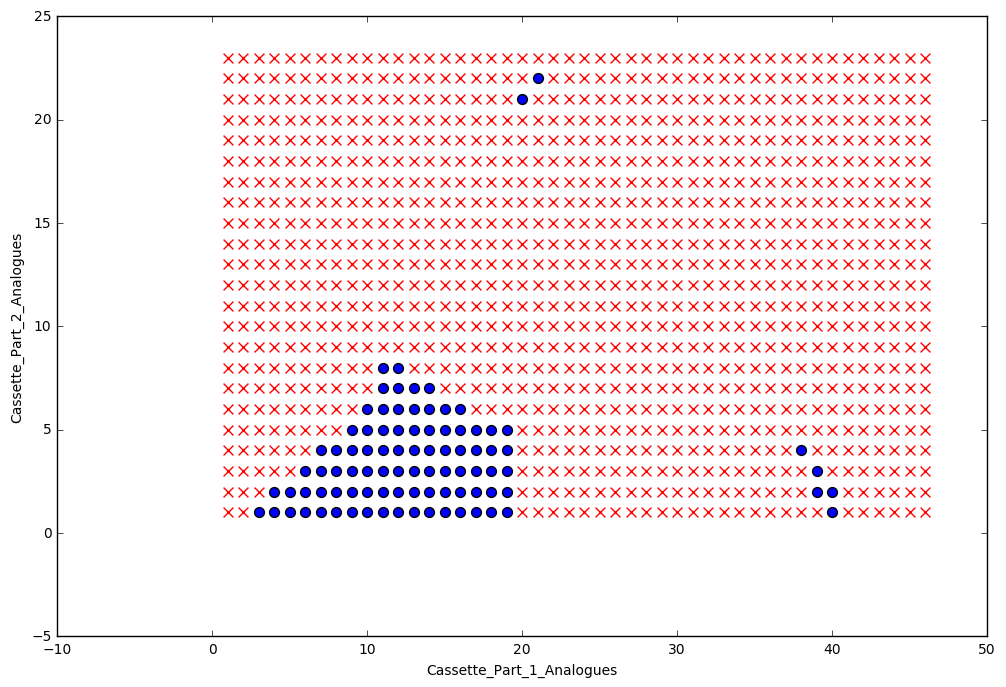

In [17]:
positive = Predicted_df[Predicted_df['Predicted_Positive?']==1]
negative = Predicted_df[Predicted_df['Predicted_Positive?']==2]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Cassette_Part_1_Analogues'], positive['Cassette_Part_2_Analogues'], s=50, c='b', marker='o', label='>=0.5')
ax.scatter(negative['Cassette_Part_1_Analogues'], negative['Cassette_Part_2_Analogues'], s=50, c='r', marker='x', label='<0.5')
ax.set_xlabel('Cassette_Part_1_Analogues')
ax.set_ylabel('Cassette_Part_2_Analogues')
plt.show()

# The combination showed with blue spots are the predicted positive combination and need be prioritized.  
